In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from catboost import Pool


In [2]:
train_set=pd.read_csv('C:\\Users\\Ян\\Desktop\\train.csv')
test_set = pd.read_csv('C:\\Users\\Ян\\Desktop\\test.csv')

c:\users\ян\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
def sum_feature(x,y):
    return x + y
def newCountPlaces(features:list):
    for i in features:
            train_set['less_500_'+ str(i)]=train_set.apply(lambda train_set: sum_feature(train_set[i + '0.001'], train_set[i + '0.005']), axis=1)
            train_set['more_500_' + str(i)]=train_set.apply(lambda train_set: sum_feature(train_set[i +'0.0075'], train_set[i + '0.01']), axis=1)
            test_set['less_500_'+ str(i)]=test_set.apply(lambda test_set: sum_feature(test_set[i + '0.001'], test_set[i + '0.005']), axis=1)
            test_set['more_500_' + str(i)]=test_set.apply(lambda test_set: sum_feature(test_set[i +'0.0075'], test_set[i + '0.01']), axis=1)
    print("done")

newCountPlaces(["osm_catering_points_in_", "osm_shops_points_in_", "osm_offices_points_in_", "osm_finance_points_in_", "osm_building_points_in_",
                "osm_culture_points_in_", "osm_amenity_points_in_", "osm_crossing_points_in_"])

done


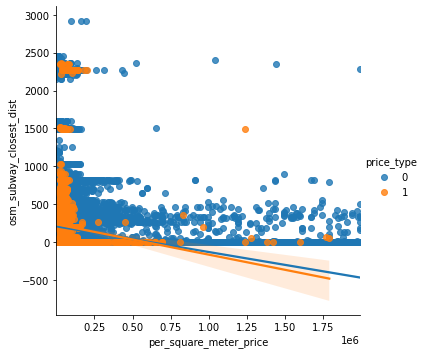

In [35]:
#train_set_2=train_set.loc[((train_set.city == 'Москва')&&(train_set.city == 'Санкт-Петербург')&&(train_set.city == 'Новосибирск')&&(train_set.city == 'Нижний Новгород')&&(train_set.city == 'Самара')&&(train_set.city == 'Екатеринбург')&&(train_set.city == 'Казань'))]

SyntaxError: invalid syntax (<ipython-input-35-0a1d49c96235>, line 1)

In [23]:
X_features = ['city','lat', 'lng','less_500_osm_amenity_points_in_','more_500_osm_amenity_points_in_','less_500_osm_building_points_in_','more_500_osm_building_points_in_', 'more_500_osm_catering_points_in_','less_500_osm_catering_points_in_', 'osm_city_closest_dist','osm_crossing_closest_dist', 'more_500_osm_crossing_points_in_','less_500_osm_crossing_points_in_',
       'more_500_osm_culture_points_in_','less_500_osm_culture_points_in_',
       'more_500_osm_finance_points_in_',
       'more_500_osm_offices_points_in_','less_500_osm_offices_points_in_','more_500_osm_shops_points_in_','less_500_osm_shops_points_in_', 'total_square',
       'price_type']

In [24]:
X_features

['city',
 'lat',
 'lng',
 'less_500_osm_amenity_points_in_',
 'more_500_osm_amenity_points_in_',
 'less_500_osm_building_points_in_',
 'more_500_osm_building_points_in_',
 'more_500_osm_catering_points_in_',
 'less_500_osm_catering_points_in_',
 'osm_city_closest_dist',
 'osm_crossing_closest_dist',
 'more_500_osm_crossing_points_in_',
 'less_500_osm_crossing_points_in_',
 'more_500_osm_culture_points_in_',
 'less_500_osm_culture_points_in_',
 'more_500_osm_finance_points_in_',
 'more_500_osm_offices_points_in_',
 'less_500_osm_offices_points_in_',
 'more_500_osm_shops_points_in_',
 'less_500_osm_shops_points_in_',
 'total_square',
 'price_type']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_set[X_features], 
                                                    train_set['per_square_meter_price'],test_size=0.3,random_state=42)


In [28]:
target_col = 'per_square_meter_price'
text_cols = []
categorical_cols = ['city']
train_pool = Pool(
        X_train, 
        y_train, 
        cat_features=categorical_cols,
        text_features=text_cols,
        feature_names=X_features,
)
valid_pool = Pool(
        X_test, 
        y_test, 
        cat_features=categorical_cols,
        text_features=text_cols,
        feature_names=X_features,
)
regr_CB =CatBoostRegressor(iterations= 800,
    learning_rate= 0.015,
    depth=16,
    task_type= 'CPU',   #'GPU',
    early_stopping_rounds= 90,
    #class_weights=[0.95,0.05],
    use_best_model= True,
    random_seed=42,
    verbose=20)

In [29]:
regr_CB.fit(train_pool, eval_set=valid_pool,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 169728.6384856	test: 172571.1602078	best: 172571.1602078 (0)	total: 4.4s	remaining: 58m 38s
20:	learn: 145688.3579779	test: 148355.9376303	best: 148355.9376303 (20)	total: 57.5s	remaining: 35m 34s
40:	learn: 128796.7587893	test: 131380.8898550	best: 131380.8898550 (40)	total: 1m 55s	remaining: 35m 45s
60:	learn: 117088.0910370	test: 119672.9134876	best: 119672.9134876 (60)	total: 2m 56s	remaining: 35m 33s
80:	learn: 109051.0548543	test: 111671.5304339	best: 111671.5304339 (80)	total: 3m 56s	remaining: 34m 59s
100:	learn: 103464.7287707	test: 106169.5111414	best: 106169.5111414 (100)	total: 4m 56s	remaining: 34m 11s
120:	learn: 99320.8137890	test: 102179.1139830	best: 102179.1139830 (120)	total: 5m 57s	remaining: 33m 26s
140:	learn: 95859.4206014	test: 98955.3577774	best: 98955.3577774 (140)	total: 6m 58s	remaining: 32m 37s
160:	learn: 93296.1053616	test: 96652.8872215	best: 96652.8872215 (160)	total: 8m 3s	remaining: 31m 59s
180:	learn: 91296.0779215	test: 94894.7594481	best:

In [31]:
regr_CB.score(X_train,y_train)

0.8227163521801195

In [32]:
regr_CB.score(X_test,y_test)

0.7802960183372054

In [37]:
predicts = regr_CB.predict(test_set[X_features])

In [40]:
test_set['per_square_meter_price'] = predicts

In [41]:
test_set[['id','per_square_meter_price']].to_csv('sub_slice.csv',header=True,index=False)